# Решение уравнения

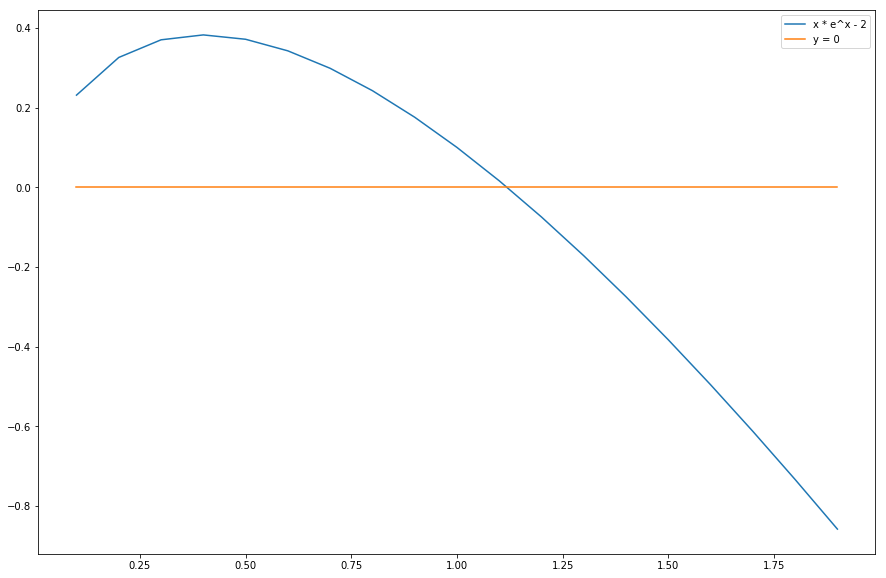

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import numpy
import sympy
from termcolor import colored
    
max_x = 2
min_x = 0.1
step = 0.1

x = np.arange(min_x, max_x, step)
y = 0.1 * x ** 2 - x * np.log(x)
#y = np.exp(x) * x - 2
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, y,  label='x * e^x - 2')


x = np.arange(min_x, max_x, step)
y = x * 0
ax.plot(x, y, label='y = 0')


plt.legend()
plt.show()

In [2]:
beg = 0.0
end = 1.5
e = 0.00000001

## Метод хорд

In [31]:
def f(x):
    return math.exp(x) * x - 2

In [32]:
prev_c = None 
a = beg
b = end
eps = e

while True:
    c = a - (f(a) / (f(b) - f(a))) * (b - a)

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    
    if prev_c == None or abs(prev_c - c) > eps:
        prev_c = c
        continue
    
    break;
    
print(colored("Root: ", 'blue') + str(c))

Root: 0.8526054956134146


## Метод касательных(Ньютона)

In [33]:
def diff(x):
    h = 1e-10 
    return (f(x + h) - f(x)) / h 

In [34]:
a = beg
b = end
eps = e

xn = None
x0 = random.uniform(a, b)
print("X0: " + str(x0))

while True:
    x0 = x0 - f(x0)/diff(x0)
    
    if abs(f(x0)) < eps:
        break

print(colored("Root: ", 'blue') + str(x0)) 

X0: 0.7320556922169135
Root: 0.8526055020137246


# Решение системы нелинейных уравнений

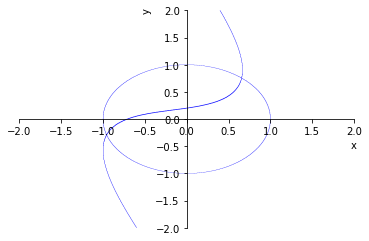

In [35]:
from IPython.display import clear_output
from sympy import plot_implicit, cos, sin, symbols, Eq, And
    
max_x = 10
min_x = -10
step = 0.1

x, y = symbols('x y')

p1 = plot_implicit(Eq(sin(x + y) - 1.2*x, 0.2), (x, -2, 2), (y, -2, 2))
p2 = plot_implicit(Eq(x**2 + y**2, 1), (x, -2, 2), (y, -2, 2))
p1.append(p2[0])
clear_output()

p1.show()

In [36]:
x0 = -1
y0 = 0

eps = 1e-9

## Метод простых итераций


In [23]:
def val_x(x, y):
    return (sin(x + y) - 0.2) / 1.2

def val_y(x, y):
    return math.sqrt((1 - x**2))

def val_y2(x, y):
    return -math.sqrt((1 - x**2)) # sqrt = +-

In [41]:
def find_roots(x0, y0, eps, val_y):
    x = 0
    y = 0

    counter = 0

    while True:
        x = val_x(x0,y0)
        y = val_y(x0,y0)
        if abs(x - x0) < eps or abs(y - y0) < eps:
            break
        x0 = x
        y0 = y

        counter += 1
        
    return x,y

In [42]:
x, y = find_roots(0.8, 0.8, eps, val_y)


print("Iterations count: " + str(counter))
print(colored("Root: ", 'blue') + "[" + str(x) + "," + str(y) + "]")


print("\n\nSecond root")
x, y = find_roots(-0.999, -0.2, 1e-9, val_y2)
print("Iterations count:" + str(counter))
print(colored("Root: ", 'blue') + "[" + str(x) + "," + str(y) + "]")


Iterations count: 27
Root: [0.656018349721047,0.7547449396967156]


Second root
Iterations count:27
Root: [-0.956825034512704,-0.29066450489376505]


## Метод Ньютона

In [50]:
def Newton_find_roots(X0, Y0, eps, is_mod):
    x, y = symbols('x y')

    x0 = np.array([X0, Y0])
    Xres = np.array([X0, Y0])

    func1 = sin(x + y) - 1.2*x - 0.2
    func2 = x**2 + y**2 - 1

    d1x = sympy.diff(func1, x)
    d1y = sympy.diff(func1, y)

    d2x = sympy.diff(func2, x)
    d2y = sympy.diff(func2, y)

    counter = 0
        
    d1xs = d1x.subs(x, x0[0]).subs(y, x0[1])
    d1ys = d2y.subs(x, x0[0]).subs(y, x0[1])

    d2xs = d2x.subs(x, x0[0]).subs(y, x0[1])
    d2ys = d2y.subs(x, x0[0]).subs(y, x0[1])

           
    
    while True:
        x0 = Xres

        f0 = np.array([func1.subs(x, x0[0]).subs(y, x0[1]), func2.subs(x, x0[0]).subs(y, x0[1])])

        if not is_mod:
            d1xs = d1x.subs(x, x0[0]).subs(y, x0[1])
            d1ys = d2y.subs(x, x0[0]).subs(y, x0[1])

            d2xs = d2x.subs(x, x0[0]).subs(y, x0[1])
            d2ys = d2y.subs(x, x0[0]).subs(y, x0[1])

        yakobi = np.array([[float(d1xs), float(d1ys)], [float(d2xs), float(d2ys)]])

        np.linalg.det(yakobi)

        Xres = x0 - np.linalg.inv(yakobi).dot(f0)
        counter += 1; 
        
        if ((abs(Xres[0] - x0[0]) < eps) or (abs(Xres[1] - x0[1]) < eps)):
            break
        
        if (counter > 100):
            print("\n\nNewton method can't find root")
            return [None, None], counter

    return Xres,counter

In [49]:
x,counter = Newton_find_roots(0.8, 0.8, eps, False)
print("Iterations count: " + str(counter))
print(colored("Root: ", 'blue') + str(x))


x, counter = Newton_find_roots(-0.999, -0.5, eps, False)
print("Iterations count: " + str(counter))
print(colored("Root: ", 'blue') + str(x))

cos(x + y) - 1.2
Iterations count: 26
Root: [0.656018348689219 0.754744941144405]
cos(x + y) - 1.2


Newton method can't find root
Iterations count: 101
Root: [None, None]


## Модифицированный метод Ньютона

In [47]:
x,counter = Newton_find_roots(0.8, 0.8, 1e-9, True)
print("Iterations count: " + str(counter))
print(colored("Root: ", 'blue') + str(x))

Iterations count: 27
Root: [0.656018348260612 0.754744941340154]


### Заключение

Не смотря на то, что обычный метод обладает квадратичной сходимостью, а модифицированный геометрически, для точности 1e-9 разница в итерациях составила: ``1``